In [1]:
import pandas as pd

# Read the processed_data.csv file
data = pd.read_csv('processed_data.csv')

,Municipality,Settlement,ID,Facility Type,Facility Name,Neighborhood,Street,House Number,X Cord,Y Cord,...,Facility Condition,Competition Standard,Official Competition Use,Year Built,School Served,Availability Category,Fencing Available Numeric,Lighting Available Numeric,Facility Condition Numeric,Facility Age
0,אבו גוש,NaN,031G2308773,אולם ספורט קטן – 15x24 מ',"אולם התעמלות ביה""ס השלום",עבדאלרחמן,עבדאלרחמן - התמר,3,210525.0,634529.0,...,תקין ופעיל,"תקני וכולל שירותים, מקלחות וחדר שופטים",ליגה מקומית ואיזורית,2019.0,כן,Low,1,1,4.0,6.0
1,אבו גוש,NaN,031G3301122,אולם ספורט בינוני – 32x19 מ',אולם פיס אבו גוש,ליד תיכון אבו גוש,השלום,12,210265.0,635399.0,...,תקין ופעיל,"תקני וכולל שירותים, מקלחות וחדר שופטים",מתקיימות במתקן תחרויות רשמיות,2008.0,חטיבת ביניים ותיכון אבו גוש,High,1,1,4.0,17.0
2,אבו גוש,NaN,031B1305253,מגרש כדורסל – 19X32 מ',מגרש משולב כדורגל תיכון,ליד אולם ספורט,השלום,12,210232.0,635383.0,...,פעיל וזקוק לשיפוץ,המתקן אינו עומד במידות התקניות לתחרויות,אינו משמש לתחרויות רשמיות,1994.0,חטיבת ביניים ותיכון אבו גוש,Very High,1,1,3.0,31.0
3,אבו גוש,NaN,031B1205740,מגרש כדורסל – 19X32 מ',מגרש קטן חטיבת ביניים,NaN,השלום,NaN,210403.0,635436.0,...,פעיל וזקוק לשיפוץ,המתקן אינו עומד במידות התקניות לתחרויות,אינו משמש לתחרויות רשמיות,2005.0,חטיבת ביניים,Medium,0,0,3.0,20.0
4,אבו גוש,NaN,031B2305241,מגרש ספורט משולב – 43X32 מ',מגרש משולב יסודי מרכז,מרכז,מחמוד רשיד,1,210393.0,635129.0,...,פעיל וזקוק לשיפוץ,המתקן אינו עומד במידות התקניות לתחרויות,אינו משמש לתחרויות רשמיות,1975.0,יסודי אבו גוש מרכז,Very High,1,1,3.0,50.0


In [2]:
from sklearn.model_selection import train_test_split

# Select features and target
features = ['Facility Age', 'Fencing Available Numeric', 'Lighting Available Numeric']
target = 'Facility Condition Numeric'

# Drop rows with missing values in features or target
data_cleaned = data.dropna(subset=features + [target])

X = data_cleaned[features]
y = data_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (5391, 3), Test set shape: (1348, 3)


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [4]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Display evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.00      0.00      0.00        28
         2.0       0.00      0.00      0.00        27
         3.0       0.33      0.04      0.07       165
         4.0       0.84      0.99      0.91      1125

    accuracy                           0.83      1348
   macro avg       0.23      0.21      0.19      1348
weighted avg       0.74      0.83      0.77      1348

Accuracy Score: 0.8323442136498517


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


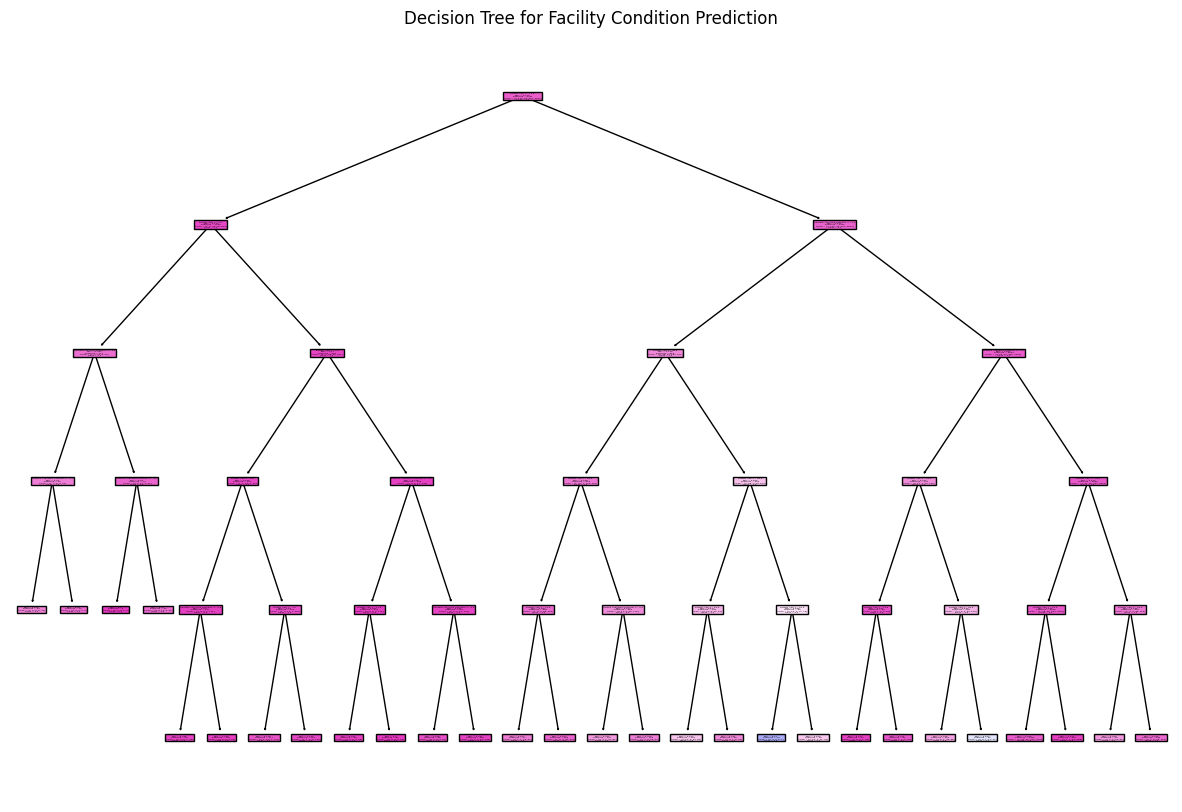

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    decision_tree, 
    feature_names=features, 
    class_names=[f"{cls:.1f}" for cls in sorted(y.unique())],
    filled=True
)
plt.title("Decision Tree for Facility Condition Prediction")
plt.show()